In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import os
import seaborn as sns

In [2]:
from scipy.stats import gaussian_kde

In [11]:
visitnum = ['FirstVisit/', 'LaterVisit/']
for visit in visitnum[-1:]:
    data_path = os.path.join(r"../dataFolders/PaperPipelineOutput/RadiusAndAngle_v2/", visit)
    # data = glob.glob(data_path + '**.csv')
    circ_params = pd.read_csv('../dataFolders/PaperPipelineOutput/CircleParameters/circle_parameters.csv')

    outfig = '../dataFolders/PaperPipelineOutput/Figures/v2/'

In [13]:
def getNameAndTrial(path, visit):
    _, tail = os.path.split(path)
    name = tail[:-19]
    name
    
#     trial = name.split('_')[2]
    trial = visit
    return(name, trial)

In [5]:
data = glob.glob(data_path +'*.csv')
# data

In [6]:
videoselection = pd.read_csv(os.path.join(r"../dataFolders/PaperPipelineOutput/FilteredTracks_v2/",visit) + 
                                          "AllVideoNames.csv")
subset = videoselection.loc[videoselection.AutomatatedTracking == 'TRUE', :]

In [7]:
subset.head()

,Unnamed: 0,names,AutomatatedTracking
0,0,c-10_m11,TRUE
1,1,c-10_m12,TRUE
2,2,c-10_m15,TRUE
4,4,c-10_m17,TRUE
6,6,c-10_m22,TRUE


In [8]:
# count how many are being left out

shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']
for shape in shapes:
    co= subset[subset.names.str.contains(shape)].names.count()
#     print(co)
    inco = videoselection[videoselection.names.str.contains(shape)].names.count() - co
    print(shape[:-1] + ':' + str(inco) + ' out of ' + str(videoselection[videoselection.names.str.contains(shape)].names.count()))

c-1:2 out of 8
c-2:3 out of 7
c-3:2 out of 11
c-10:2 out of 13


In [14]:
df = pd.DataFrame([])
for eachfile in data:
    
    temp = pd.read_csv(eachfile)

    name, trial = getNameAndTrial(eachfile, visit)
    
    if np.any(subset.names == name):
        p1 = pd.Series(data = [name] * len(temp), name = 'name')
        p2 = pd.Series(data = [trial] * len(temp), name = 'trial')

        temp1 = pd.concat([temp, p1, p2], axis = 1)

        df = df.append(temp1)
        df = df[(df.radial_distance_normalized.notnull()) & (df.angle.notnull())]

In [15]:
df.head()

,x_centered,y_centered,radial_distance_normalized,angle,name,trial
0,-211.286962,-2.022963,2.855360,7.546547,c-10_m11,LaterVisit/
1,-194.495344,0.365375,2.628320,8.427820,c-10_m11,LaterVisit/
2,-181.990256,2.261506,2.459518,9.415801,c-10_m11,LaterVisit/
3,-173.071306,3.645187,2.339320,9.706789,c-10_m11,LaterVisit/
4,-167.038100,4.496178,2.258089,8.174898,c-10_m11,LaterVisit/


## plot the distribution of angle

In [10]:
bin_center = np.linspace(0, 90,200)
delta = np.diff(bin_center)[0]

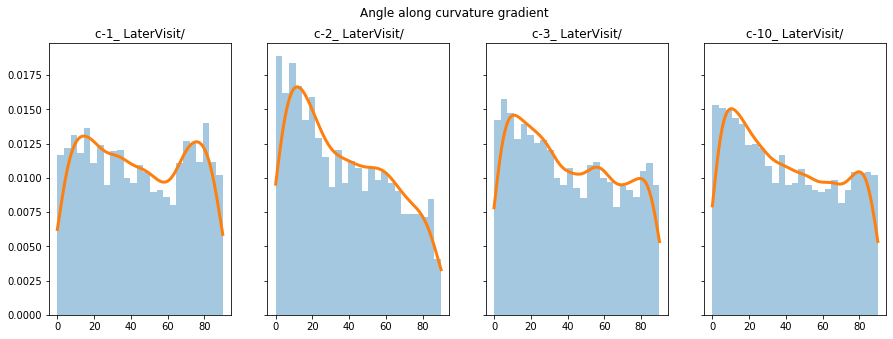

In [17]:
# draw the angle distribution
fig, ax = plt.subplots(1,4, figsize = (15,5), sharex = True, sharey = True)
ax = ax.ravel()

shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']
bins = 25

# df = df[df.radial_distance_normalized < 0.9]
# remove radial distances larger than 1.5r
df = df[df.radial_distance_normalized < 1.5]


for i, shape in enumerate(shapes):
    sub_df = df.loc[(df.name.str.contains(shape)) & 
                         (df.trial == visit), 'angle'].values
    sns.distplot(sub_df, ax = ax[i], bins = bins, kde = False, norm_hist = True)
    ax[i].set_title(shape + ' ' + visit)
    
    
    kde = gaussian_kde(sub_df)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    ax[i].plot(bin_center, temp, linewidth = 3)
#     ax[i+4].plot(sub_df, [0.001]*len(sub_df), '|')
#                 , color = colorScheme[cc])

#     sub_df = df.loc[(df.name.str.contains(shape)) & 
#                          (df.trial == 'last'), 'angle_savgol'].values
#     sns.distplot(sub_df, ax = ax[i + 4], bins = bins, kde = False, norm_hist = True)
#     ax[i + 4].set_title(shape + ' last trials')

#     ax[i].set_ylim([0, 0.045])
plt.suptitle('Angle along curvature gradient')
fig.savefig(outfig + 'angleDistributions_projection_'+ visit[:-1] + '.png')

## draw the radial distribution distribution

In [18]:
bin_center = np.linspace(0, 1.5,200)
delta = np.diff(bin_center)[0]

c-1__1.0
c-2__1.0
c-3__1.0
c-10__0.9999999999999999


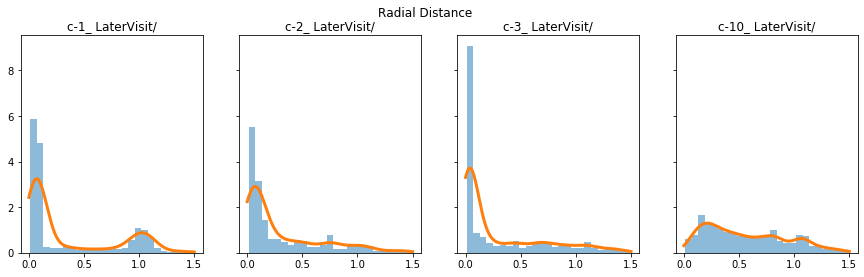

In [20]:
fig, ax = plt.subplots(1,4, figsize = (15,4), sharex = True, sharey = True)
ax = ax.ravel()

shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']
bins = 25

# remove radial distances larger than 1.5r
df = df[df.radial_distance_normalized < 1.5]

for i, shape in enumerate(shapes):
    sub_df = df.loc[(df.name.str.contains(shape)) & 
                         (df.trial == visit), 'radial_distance_normalized'].values
#     val, edges = np.histogram(sub_df, bins = bins)
    n , bins, _ = ax[i].hist(sub_df, bins = bins, density = 1, alpha = 0.5)
    ax[i].set_title(shape + ' ' + visit)
    
    
    # check normed function
    print(shape + '_' + str(np.sum(n*np.diff(bins))))
    
    kde = gaussian_kde(sub_df)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    ax[i].plot(bin_center, temp, linewidth = 3)
#     ax[i+4].plot(sub_df, [-0.001]*len(sub_df), '|')

#     sub_df = df.loc[(df.name.str.contains(shape)) & 
#                          (df.trial == 'last'), 'angle_savgol'].values
#     sns.distplot(sub_df, ax = ax[i + 4], bins = bins, kde = False, norm_hist = True)
#     ax[i + 4].set_title(shape + ' last trials')

#     ax[i].set_ylim([0, 0.045])
plt.suptitle('Radial Distance')
fig.savefig(outfig + 'Radial Distribution' + visit[:-1] + '.png')

## draw the radial and angle distribution together

c-1_ has # datapoints: 947
c-1_0.3191109230332137
c-2_ has # datapoints: 527
c-2_0.3518559483604742
c-3_ has # datapoints: 1388
c-3_0.29941146229496085
c-10_ has # datapoints: 4779
c-10_0.24365602877059805


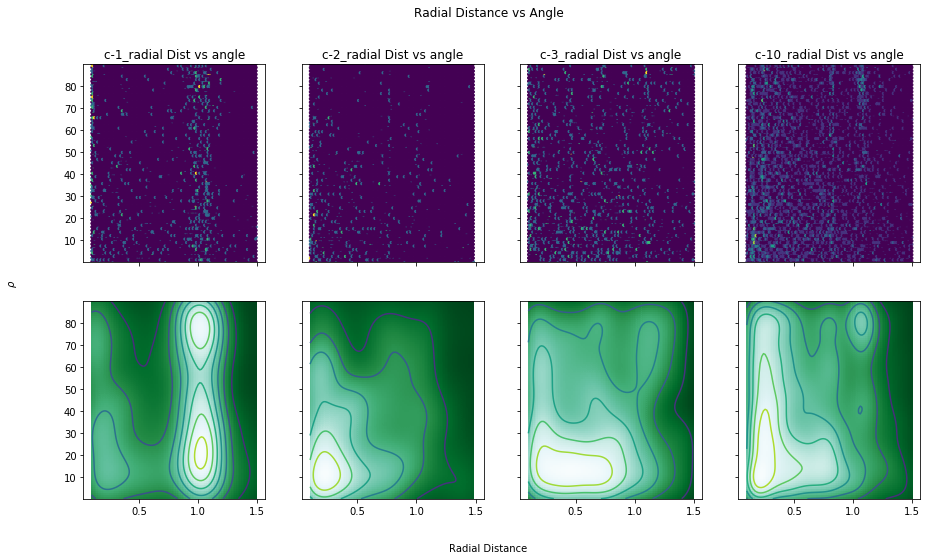

In [21]:
nrows = 2
f1, ax = plt.subplots(nrows,4, figsize = (15,4*nrows), sharex = True, sharey = True)

ax = ax.ravel()

shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']

# remove radial distances larger than 1.5r
df = df[(df.radial_distance_normalized < 1.5)
        & (df.radial_distance_normalized > 0.1) ]

for i, shape in enumerate(shapes):
    r = df.loc[(df.name.str.contains(shape)) & 
                         (df.trial == visit), 'radial_distance_normalized']
    
    print(shape + ' has # datapoints: ' + str(len(r)))
    
    angle = df.loc[(df.name.str.contains(shape)) & 
                         (df.trial == visit), 'angle']
    
    
#     ax[i].scatter(r, angle, alpha=0.01)
    
#     temp = df[(df.radial_distance_normalized.notnull()) & (df.angle.notnull())]
#     r = temp.loc[:, 'radial_distance_normalized']
#     angle = temp.loc[:, 'angle']
    ax[i].hexbin(r, angle)
    ax[i].set_title(shape + 'radial Dist vs angle')
    
    
    # perform a kernel density estimation
    
    m1 = r
    m2 = angle
    xmin = m1.min()
    xmax = m1.max()
    ymin = m2.min()
    ymax = m2.max()
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([m1, m2])
    kernel = gaussian_kde(values)
    print(shape + str(kernel.factor))
    Z = np.reshape(kernel(positions).T, X.shape)
    
    ax[i+4].pcolormesh(X, Y, Z.reshape(X.shape), cmap=plt.cm.BuGn_r)
    ax[i+4].contour(X, Y, Z.reshape(X.shape) )

    
    

#     sub_df = df.loc[(df.name.str.contains(shape)) & 
#                          (df.trial == 'last'), 'angle_savgol'].values
#     sns.distplot(sub_df, ax = ax[i + 4], bins = bins, kde = False, norm_hist = True)
#     ax[i + 4].set_title(shape + ' last trials')

#     ax[i].set_ylim([0, 0.045])

f1.text(0.5, 0.04, 'Radial Distance', ha='center', va='center')
f1.text(0.06, 0.5, r'$\rho$', ha='center', va='center', rotation='vertical')


plt.suptitle('Radial Distance vs Angle')
plt.savefig(outfig+ 'anglevsRadialDist'+ visit[:-1]+ '.png')




In [45]:
shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']

# remove radial distances larger than 1.5r
df = df[(df.radial_distance_normalized < 1.5)
        & (df.radial_distance_normalized > 0.1) ]

ratio = [0.5, 0.7 , 1.5, 2.]
# ratio = [1.5]

for ratio in ratio:
    
    nrows = 2
    f1, ax = plt.subplots(nrows,4, figsize = (15,4*nrows), sharex = True, sharey = True)
    ax = ax.ravel()
    
    for i, shape in enumerate(shapes):
        r = df.loc[(df.name.str.contains(shape)) & 
                             (df.trial == visit), 'radial_distance_normalized']

        print(shape + ' has # datapoints: ' + str(len(r)))

        angle = df.loc[(df.name.str.contains(shape)) & 
                             (df.trial == visit), 'angle']

        ax[i].hexbin(r, angle)
        ax[i].set_title(shape + 'radial Dist vs angle')


        # perform a kernel density estimation
        m1 = r
        m2 = angle
        xmin = m1.min()
        xmax = m1.max()
        ymin = m2.min()
        ymax = m2.max()
        X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
        positions = np.vstack([X.ravel(), Y.ravel()])
        values = np.vstack([m1, m2])
        kernel = gaussian_kde(values)
        kernel.set_bandwidth(bw_method=kernel.factor / ratio)
        print(shape + str(kernel.factor))
        Z = np.reshape(kernel(positions).T, X.shape)

        ax[i+4].pcolormesh(X, Y, Z, cmap=plt.cm.BuGn_r)
        ax[i+4].contour(X, Y, Z, levels=4)


    f1.text(0.5, 0.04, 'Radial Distance', ha='center', va='center')
    f1.text(0.06, 0.5, r'$\rho$', ha='center', va='center', rotation='vertical')

    plt.suptitle('Radial Distance vs RRO ' + str(ratio))
    name = outfig + 'anglevsRadialDist_' + visit[:-1] + '_' + str(ratio) + '.png'
    plt.savefig(name)
    plt.clf()

c-1_ has # datapoints: 947
c-1_0.6382218460664274
c-2_ has # datapoints: 527
c-2_0.7037118967209484
c-3_ has # datapoints: 1388
c-3_0.5988229245899217
c-10_ has # datapoints: 4779
c-10_0.4873120575411961
c-1_ has # datapoints: 947
c-1_0.4558727471903053
c-2_ has # datapoints: 527
c-2_0.5026513548006775
c-3_ has # datapoints: 1388
c-3_0.42773066042137264
c-10_ has # datapoints: 4779
c-10_0.3480800411008544
c-1_ has # datapoints: 947
c-1_0.2127406153554758
c-2_ has # datapoints: 527
c-2_0.23457063224031613
c-3_ has # datapoints: 1388
c-3_0.1996076415299739
c-10_ has # datapoints: 4779
c-10_0.16243735251373204
c-1_ has # datapoints: 947
c-1_0.15955546151660685
c-2_ has # datapoints: 527
c-2_0.1759279741802371
c-3_ has # datapoints: 1388
c-3_0.14970573114748043
c-10_ has # datapoints: 4779
c-10_0.12182801438529903


<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

In [35]:
Z.shape

(100, 100)

In [37]:
Z.reshape(X.shape).shape

(100, 100)